In [2]:
import numpy as np
import pandas as pd

In [3]:
import glob
files=glob.glob("./*.csv")
l1=[]
for file in files:
    df=pd.read_csv(file,index_col=None,header=0)
    l1.append(df)
us_cencus=pd.concat(l1,axis=0,ignore_index=True)
us_cencus.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [4]:
us_cencus.drop(columns=["Unnamed: 0"], inplace=True)

In [5]:
us_cencus.dtypes

State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object

In [39]:
us_cencus[["Male","Female"]]=us_cencus.GenderPop.str.split("_",expand=True)

In [40]:
us_cencus.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Male,Female
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093_2489527,2341093,2489527
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160_349215,384160,349215
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088_3342840,3299088,3342840
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913_1506295,1451913,1506295
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135_19334329,19087135,19334329


In [41]:
us_cencus.drop(columns=["GenderPop"],inplace=True)

In [42]:
us_cencus.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093,2489527
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160,349215
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088,3342840
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913,1506295
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135,19334329


In [50]:

us_cencus=us_cencus.replace("$","",regex=True)

In [45]:
us_cencus=us_cencus.replace("%","",regex=True)

In [46]:
us_cencus=us_cencus.replace("M","",regex=True)

In [47]:
us_cencus=us_cencus.replace("F","",regex=True)

In [51]:
us_cencus.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093,2489527
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160,349215
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088,3342840
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913,1506295
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135,19334329


In [52]:
us_cencus.dtypes

State        object
TotalPop      int64
Hispanic    float64
White       float64
Black       float64
Native      float64
Asian       float64
Pacific     float64
Income      float64
Male         object
Female       object
dtype: object

In [53]:
us_cencus.loc[:,"Hispanic":"Income"]=round(us_cencus.loc[:,"Hispanic":"Income"].apply(pd.to_numeric),2)

In [54]:
us_cencus.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093,2489527
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160,349215
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088,3342840
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913,1506295
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135,19334329


In [55]:
us_cencus["Male"]=us_cencus["Male"].astype(int)

In [44]:
us_cencus["Female"]=us_cencus["Female"].astype(int)#empty spaces in columns

ValueError: invalid literal for int() with base 10: ''

In [56]:
us_cencus.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093,2489527
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160,349215
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088,3342840
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913,1506295
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135,19334329


In [57]:
#identyfying empty colums
np.where(us_cencus.applymap(lambda x:x==""))

(array([20, 26], dtype=int64), array([10, 10], dtype=int64))

In [58]:
#Since total pop= male+Female obtain female col by male col from totalpop col
us_cencus["Female"]=us_cencus["TotalPop"]-us_cencus["Male"]

In [60]:
us_cencus.head(25)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093,2489527
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160,349215
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088,3342840
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913,1506295
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135,19334329
5,Colorado,5278906,20.78,69.90,3.55,0.57,2.66,NaN,64657.80,2648667,2630239
7,Connecticut,3593222,15.60,67.68,10.35,0.13,4.02,0.02,76146.56,1751607,1841615
8,Delaware,926454,8.82,64.63,20.74,0.26,3.27,NaN,61827.98,448413,478041
9,District of Columbia,647484,9.17,33.10,51.78,0.20,3.38,0.03,75466.36,306674,340810
10,lorida,19645772,21.34,59.08,15.17,0.21,2.28,0.05,50690.19,9600009,10045763


In [62]:
us_cencus.dtypes

State        object
TotalPop      int64
Hispanic    float64
White       float64
Black       float64
Native      float64
Asian       float64
Pacific     float64
Income      float64
Male          int32
Female        int64
dtype: object

In [63]:
us_cencus.duplicated().any()

False

In [64]:
us_cencus.drop_duplicates(inplace=True)

In [65]:
us_cencus.duplicated().any()

False

<function matplotlib.pyplot.show(close=None, block=None)>

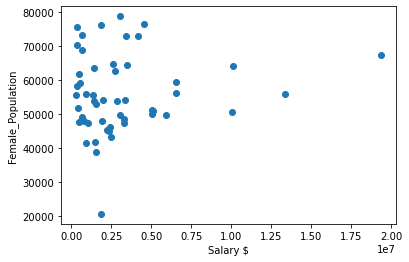

In [66]:
import matplotlib.pyplot as plt
plt.scatter(us_cencus["Female"],us_cencus["Income"])
plt.xlabel("Salary $",fontsize=10)
plt.ylabel("Female_Population",fontsize=10)
plt.show

In [67]:
us_cencus.describe()

,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
count,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000,47.000000,51.000000,5.100000e+01,5.100000e+01
mean,6.265067e+06,12.648039,67.261176,11.945098,1.547843,3.645098,0.307021,55922.667255,3.081423e+06,3.183644e+06
std,7.017552e+06,15.697733,18.394281,11.854634,3.105255,5.293489,1.278634,11479.923759,3.464446e+06,3.553646e+06
min,6.266040e+05,1.290000,0.770000,0.090000,0.000000,0.080000,0.000000,20720.540000,3.066740e+05,3.180310e+05
25%,1.860392e+06,4.675000,56.805000,3.055000,0.195000,1.245000,0.025000,48358.540000,9.216185e+05,9.387740e+05
50%,4.397353e+06,8.460000,71.140000,8.200000,0.360000,2.320000,0.040000,54207.820000,2.164208e+06,2.233145e+06
75%,6.845525e+06,13.415000,79.635000,17.370000,1.035000,3.845000,0.085000,63889.835000,3.393406e+06,3.476838e+06
max,3.842146e+07,98.890000,93.980000,51.780000,16.390000,36.590000,8.760000,78765.400000,1.908714e+07,1.933433e+07


# PLOT HISTORIGRAM FOR RACES

In [68]:
histori=round(us_cencus.loc[:,'Hispanic':'Pacific'].apply(lambda x :x*us_cencus["TotalPop"]/100))

In [69]:
histori.dtypes

Hispanic    float64
White       float64
Black       float64
Native      float64
Asian       float64
Pacific     float64
dtype: object

In [71]:
histori.isnull().any()

Hispanic    False
White       False
Black       False
Native      False
Asian       False
Pacific      True
dtype: bool

In [73]:
histori.fillna(method='bfill',inplace=True)

In [76]:
histori.astype(int).head()

,Hispanic,White,Black,Native,Asian,Pacific
0,181148,2989188,1509569,21738,50722,1449
1,43342,446699,20901,120200,39969,7774
2,1964018,3793869,255714,289588,191288,11291
3,184001,2104469,561172,15383,33724,4437
4,14327364,15453113,2182339,157528,5014001,134475


array([[<AxesSubplot:title={'center':'Hispanic'}>]], dtype=object)

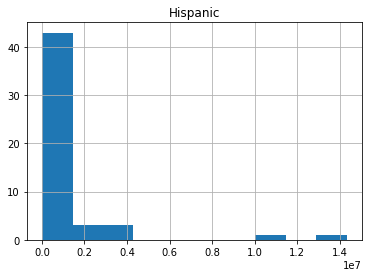

In [79]:
histori.hist(column="Hispanic")

array([[<AxesSubplot:title={'center':'Black'}>]], dtype=object)

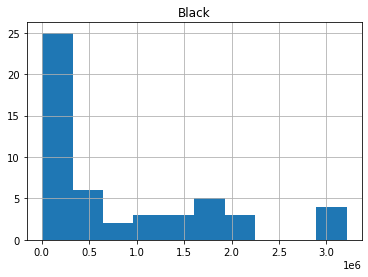

In [80]:
histori.hist(column="Black")